In [3]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### sigmoid 함수 정의
> 선형 변환을 비선형 효과를 부여하는 활성화 함수 중 하나, 0 ~ 1 사이의 실수로 출력

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

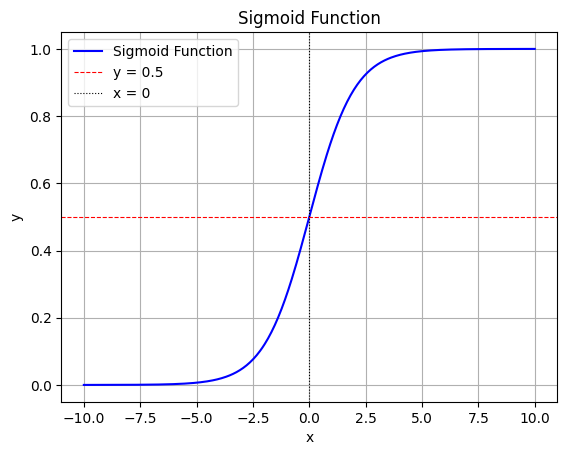

In [4]:
# x 값 범위 설정
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# 그래프 그리기
plt.plot(x, y, label="Sigmoid Function", color="blue")
plt.axhline(0.5, color='red', linestyle='dashed', linewidth=0.8, label="y = 0.5")
plt.axvline(0, color='black', linestyle='dotted', linewidth=0.8, label="x = 0")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")
plt.legend()
plt.grid()
plt.show()

In [16]:
"은닉층 뉴런은 4개, 출력층의 뉴런은 3개이므로 완전연결계층에 사용되는 가중치 행렬은 4*3 형상으로 설정"
x = np.random.randn(10, 2) # 입력 - 2차원 데이터 10개가 미니배치로 처리
w_1 = np.random.randn(2, 4) # 가중치
b_1 = np.random.randn(4) # 편향
w_2 = np.random.randn(4, 3) # 가중치
b_2 = np.random.randn(3) # 편향

h = np.matmul(x, w_1) + b_1
"은닉층 뉴런을 시그모이드 함수를 통하여 비선형 변환"
a = sigmoid(h) # a: activation, 활성화
s = np.matmul(a, w_2) + b_2 # 최종 출력, 형상은 (10, 3) - 10개의 데이터가 한꺼번에 처리되고 3차원 데이터로 변환됨

이 신경망은 3차원 데이터를 출력하고, 각 차원의 값을 이용해 3 클래스 분류가 가능함
출력된 3차원 벡터의 각 차원은 각 클래스에 대응하는 score가 되고 출력층에서 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과가 됨

* score는 확률이 되기 전의 값임
* 점수가 높을수록 그 뉴런에 해당하는 클래스의 확률도 높아짐
* 점수를 softmax function에 입력하면 확률을 얻을 수 있음

구현 규칙
- **모든 계층은 forward, backward 메서드를 가짐**
    - forward: 순전파
    - backward: 역전파
- **모든 계층은 인스턴스 변수인 params와 grads를 가짐**
    - params: 가중치와 편향 같은 매개변수를 담는 리스트
    - grads: params에 저장된 각 매개변수에 대응해 매개변수의 기울기를 보관하는 리스트

신경망 추론 과정에서 하는 처리는 신경망의 순전파(forward propagation)에 해당함
- 순전파: 입력층에서 출력층으로 향하는 전파
- 역전파: 데이터(기울기)를 순전파와는 반대 방향으로 전파

In [18]:
"""
- 완전연결계층에 의한 변환을 Affine 계층으로, sigmoid에 의한 변환을 sigmoid 계층으로 구현
- 기본 변환을 수행하는 메서드 forward()
"""

class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

class Affine:
    # 초기화될 때 가중치와 편향을 받음 - 신경망이 학습될 때 수시로 갱신됨
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

### 구현할 신경망(TwoLayerNet)의 계층 구성

$$
X -> Affine -> Sigmoid -> Affine -> S
$$

input: X가 affine, sigmoid, affine을 거쳐 점수 S 출력

In [20]:
class TwoLayerNet:
    """
    가중치 초기화 및 3개의 계층 생성
    input_size: 입력층 뉴런 수
    hidden_size: 은닉층 뉴런 수
    output_size: 출력층 뉴런 수
    """
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 정규 분포를 따르는 랜덤 값으로 초기화
        w_1 = np.random.randn(I, H) # 입력층 -> 은닉층 연결 가중치 I * H
        b_1 = np.random.randn(H)  # 은닉층 편향 H
        w_2 = np.random.randn(H, O) # 은닉층 -> 출력층 연결 가중치 H * O
        b_2 = np.random.randn(O) # 출력층의 편향 O
        
        self.layers = [
            Affine(w_1, b_1), # 선형 변환 계층 (입력 -> 은닉층)
            Sigmoid(), # 비선형 활성화 함수 계층
            Affine(w_2, b_2) # 선형 변환 계층 (은닉층 -> 출력층)
        ]
        
        # 학습해야 할 모든 가중치를 리스트에 모음
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    "순전파"
    def predict(self, x):
        # 입력 x를 순차적으로 각 계층에 통과시키며 순전파 수행
        for layer in self.layers:
            x = layer.forward(x)
        return x # 최종 출력값 반환

In [23]:
# 신경망 추론 수행
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[ 2.29955785, -0.80216072,  1.74146422],
       [ 3.04572318,  0.12921569,  3.02420303],
       [ 3.75122376, -1.11512149,  4.15472076],
       [ 3.80650683, -0.78530621,  3.95492371],
       [ 3.28794744,  0.5355063 ,  3.57565178],
       [ 3.47877838, -0.2408703 ,  3.0800183 ],
       [ 3.23756319,  0.13611286,  3.12253667],
       [ 3.10416248, -0.11644991,  2.77095821],
       [ 2.75507256, -0.54416709,  2.21655067],
       [ 4.06221483, -0.27809365,  4.18075792]])

### 손실 함수
손실(loss): 학습 단계의 특정 시점에서 신경망의 성능을 나타내는 척도

손실은 학습 데이터와 신경망이 예측한 결과를 비교하여 예측이 얼마나 나쁜가를 산출한 단일 값(스칼라)
- loss function을 통해 신경망의 손실을 구함
- 다중 클래스 분류 신경망에서는 손실 함수로 cross entropy error를 이용 -> 신경망이 출력하는 각 클래스의 확률과 정답 레이블을 이용해 구할 수 있음

#### 손실 함수를 적용한 신경망의 계층 구성
$$
t(정답레이블)
$$
$$
X -> Affine -> Sigmoid -> Affine -> Softmax -> Cross Entropy Error -> L
$$

- x: input
- t: 정답레이블
- L: 손실

softmax 계층의 출력은 확률이 되어 다음 계층인 Cross Entropy Error 계층에는 확률과 정답 레이블이 입력됨

### softmax 함수

$$
y_k = \frac{\exp(s_k)}{\sum_{i=1}^{n} \exp(s_i)}
$$

출력이 n개일 때, k번째의 출력 $y_k$를 구하는 계산식
- $y_k$는 k번째 클래스에 해당하는 소프트맥스 함수의 출력

소프트맥스 함수의 출력의 각 원소는 0.0 ~ 1.0 이하의 실수 -> 그 원소들을 모두 더하면 1.0
- 소프트맥스의 출력을 확률로 해석할 수 있는 이유

소프트맥스의 출력인 이 확률이 다음 차례인 교차 엔트로피 오차에 입력됨

### 교차 엔트로피 오차
$$
L = -\sum_{k} t_k \log y_k
$$
- $t_k$: k번째 클래스에 해당하는 정답 레이블
- 정답 레이블 t = [0, 0, 1] 과 같이 one hot 벡터로 표기(원소 하나만 1, 나머지는 다 0인 벡터이며 1이면 정답)

미니 배치를 고려한 교차 엔트로피 오차의 식 -> 평균 손실함수를 구함
$$
L = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk}
$$
- 데이터는 N개
 - $t_{nk}$ 는 n번째 데이터의 k차원째의 값
- $y_{nk}$는 신경망의 출력
- $t_{nk}$는 정답레이블

### 미분과 기울기
> 신경망 학습의 목표: 손실을 최소화하는 매개변수를 찾는 것

행렬에서의 기울기
$W = m * n$ 행렬에서 $L = g(W)$ 함수의 기울기:
$$
\frac{\partial L}{\partial \mathbf{W}} =
\begin{bmatrix}
\frac{\partial L}{\partial W_{11}} & \cdots & \frac{\partial L}{\partial W_{1n}} \\
\vdots & \ddots & \vdots \\
\frac{\partial L}{\partial W_{m1}} & \cdots & \frac{\partial L}{\partial W_{mn}}
\end{bmatrix}
$$
- 각 원소  $\frac{\partial L}{\partial W_{ij}}$ 는 개별 가중치  $W_{ij}$가 변화할 때 손실 L이 얼마나 변하는지를 나타냅니다.

W와 $\frac{\partial L}{\partial \mathbf{W}}$ 의 형상이 같고 `행렬과 그 기우기의 형상이 같다` 성질을 이용해 매개변수 갱신과 연쇄 법칙을 쉽게 구현 가능

### 행렬에서의 기울기(Gradient)

행렬에서의 기울기(Gradient)는 행렬을 구성하는 각 원소에 대한 미분 값을 의미하며, 보통 손실 함수(Loss Function) L를 특정 행렬 W에 대해 미분한 결과를 나타냅니다.
즉, 행렬의 각 요소가 변경될 때 손실 함수가 얼마나 변하는지를 나타내는 것입니다.

### 행렬 기울기의 의미
행렬에서 기울기: 각 가중치 요소별로 손실 함수가 증가하거나 감소하는 방향을 나타내는 값
	•	값이 양수: 손실  L  이 증가하는 방향 → 이 가중치를 줄여야 함
	•	값이 음수: 손실  L  이 감소하는 방향 → 이 가중치를 증가시켜야 함
	•	값이 0: 해당 가중치 변화가 손실에 영향을 거의 주지 않음

이 개념은 경사 하강법 (Gradient Descent) 에서 중요하게 사용됩니다.
즉, 행렬 형태의 기울기를 계산한 후, 그 방향으로 가중치를 업데이트하여 손실을 최소화하는 방향으로 학습합니다.

-> 즉, 행렬의 기울기는 신경망 학습에서 “어떻게 가중치를 변경해야 손실을 줄일 수 있는지”를 알려줌

### 연쇄법칙

연쇄법칙은 composite function 의 미분을 계산하는 방법 => 합성함수의 미분은 각 단계의 미분을 곱해서 구할 수 있다는 원리
$$
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}
$$

### 오차역전파법

오차역전파법은 신경망에서 연쇄법칙을 이용해 가중치의 기울기를 계산하는 방법

신경망에서는 입력x  가 여러 층을 거쳐 최종적으로 손실  L  에 영향을 주는 복잡한 합성함수 형태를 가짐
$$

L = f_3(f_2(f_1(x)))

$$
를 미분할 때, 각 층을 거치면서 미분을 계산해야 하므로 연쇄법칙이 필수적으로 사용됨

![](./src/forward_back.png)

### Repeat 노드의 순전파, 역전파
![](./src/repeat_node.png)

In [29]:
D, N = 8, 7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis=0) # 순전파 - 원소 복제 수행 배열x를 N번 복제
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) # 역전파 - 차원수 유지

### MatMul 노드

![](./src/matmul.png)

$y = xW$ 

손실함수 L이 주어졌을 때, 입력 x에 대한 손실의 변화량$\frac{\partial L}{\partial \mathbf{x}}$을 구해야함

연쇄법칙을 적용하여 L을 x에 대해 미분하면

$$
\frac{\partial L}{\partial \mathbf{x}} = \sum_j \frac{\partial L}{\partial y_j} \frac{\partial y_j}{\partial \mathbf{x}}
$$

y가 MatMul 연산에 의해 계산되어
$$
\frac{\partial y_j}{\partial x_i} = W_{ij}
$$
즉, 가중치 W가 직접적으로 미분값에 영향을 줌

행렬 연산으로 표현하면
$$

\frac{\partial L}{\partial \mathbf{x}} = \frac{\partial L}{\partial \mathbf{y}} \mathbf{W}^T
$$

전치행렬이 필요한 이유
- 역전파 과정에서 입력 x와 출력 y가 서로 다른 크기를 갖고 있어서 올바른 차원으로 변환하려면 transpose가 필요함

1. MatMul의 forward
$$

\mathbf{y} = \mathbf{x} \mathbf{W} \quad (1 \times D) \times (D \times H) = (1 \times H)

$$
2. MatMul의 backward
$$
\frac{\partial L}{\partial \mathbf{x}} = \frac{\partial L}{\partial \mathbf{y}} \mathbf{W}^T \quad
 (1 \times H) \times (H \times D) = (1 \times D)

$$

MatMul 역전파는 역추적 과정을 하는 것과 비슷합니다.
	•	순전파에서는  x  가  W  를 거쳐서  y  가 나옵니다.
	•	하지만 역전파할 때는 반대 방향으로 전달해야 하기 때문에  W  를 다시 되돌리는 과정이 필요합니다.
	•	그런데 행렬 곱셈에서는 되돌릴 때 단순히  W  를 그대로 쓰면 안 되고, 전치(Transpose) 를 해서 올바른 방향으로 변환해야 합니다.

💡 즉, MatMul의 역전파는 “전치 행렬을 이용해 원래 입력 방향으로 영향을 돌려주는 과정”이라고 생각하면 됩니다! 🚀

In [30]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

In [32]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    
    def forwar(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx